In [1]:
from braket.aws.aws_session import AwsSession 
import boto3
import os 
from dotenv import load_dotenv
from qiskit import *
from qiskit_braket_provider import BraketProvider
from qiskit.visualization import plot_histogram
from matplotlib import pyplot

Section - Qubit Register and Classical Register Initialization

In [2]:
# Load environment variables 
load_dotenv()

boto_session = boto3.Session(
    aws_access_key_id=os.environ['aws_access'],
    aws_secret_access_key=os.environ['aws_secret'],
    region_name=os.environ['aws_region'],
)
session = AwsSession(boto_session)
provider = BraketProvider()
backend = provider.get_backend("SV1", aws_session = session)

num_bits = 4 # number of random bits to generate

qr = QuantumRegister(num_bits, name='qr')
cr = ClassicalRegister(num_bits, name='cr')
qrng = QuantumCircuit(qr,cr)

Section - Superposition State Preparation (Equal weights to all basis states)

In [3]:
for i in range(num_bits):
    qrng.h(qr[i])


qrng.measure(qr, cr)

Section - Circuit Visualization

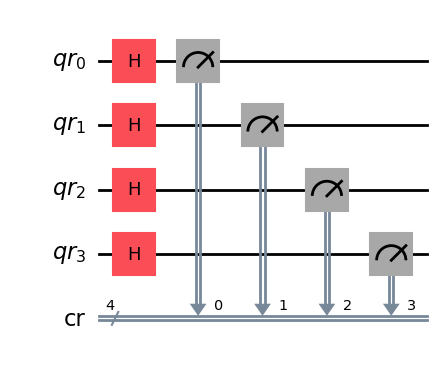

In [4]:
qrng.draw("mpl")

Section - Circuit Execution and Result Analysis

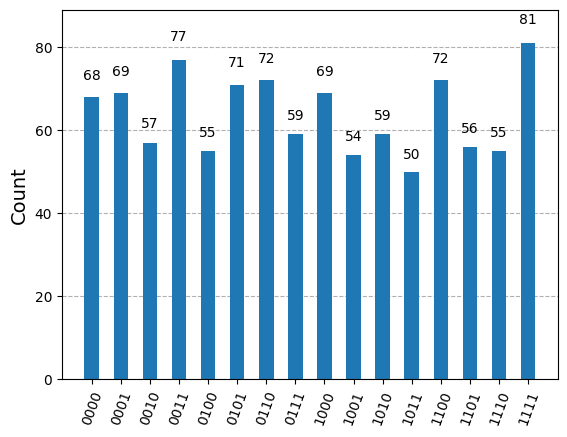

In [5]:
qc_compiled = transpile(qrng, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts()

# Plot the result
plot_histogram(counts)